# Import libraries


In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('IRIS_dataset.csv')

In [3]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization

<Figure size 800x600 with 0 Axes>

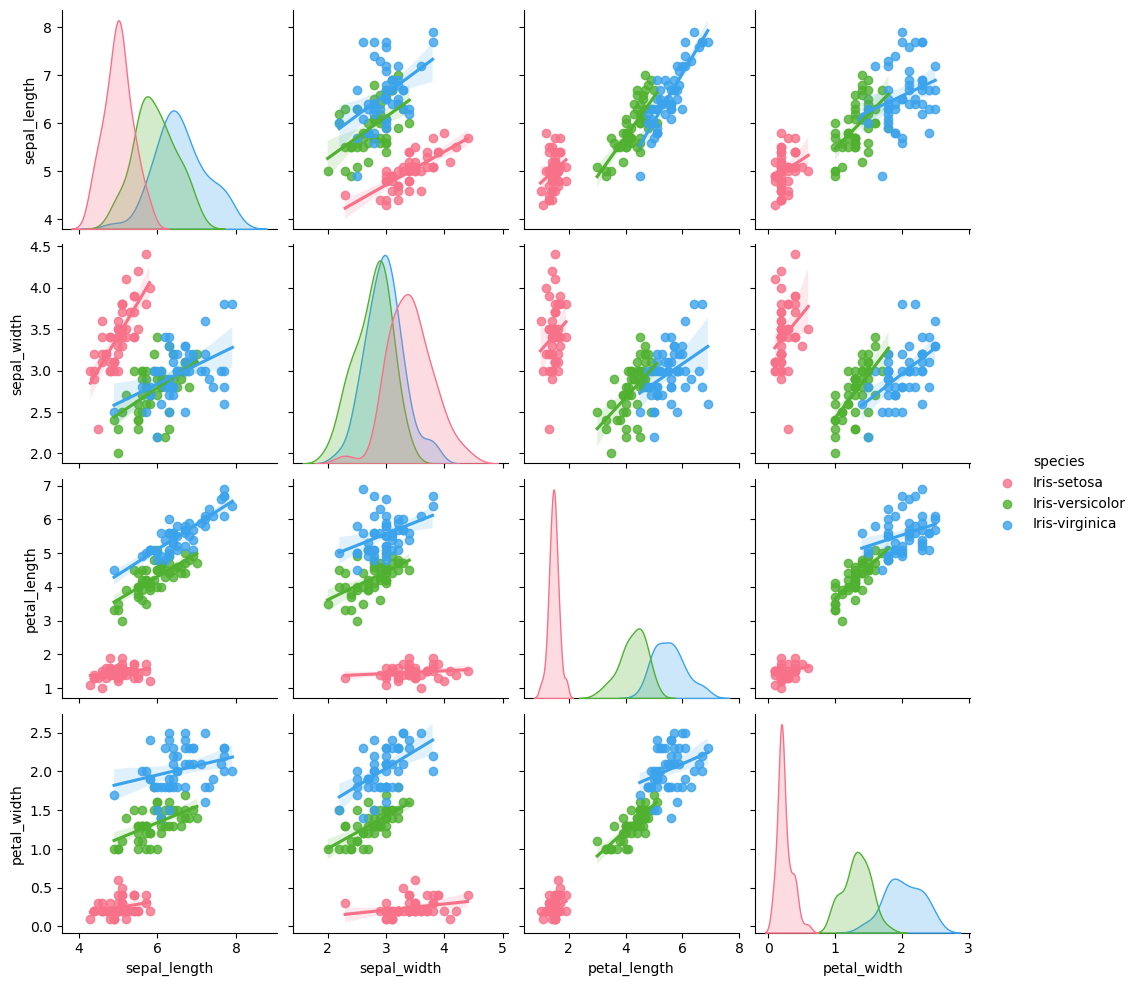

In [6]:
plt.figure(figsize=(8,6));
sns.pairplot(iris,kind='reg',hue ='species',palette="husl" );

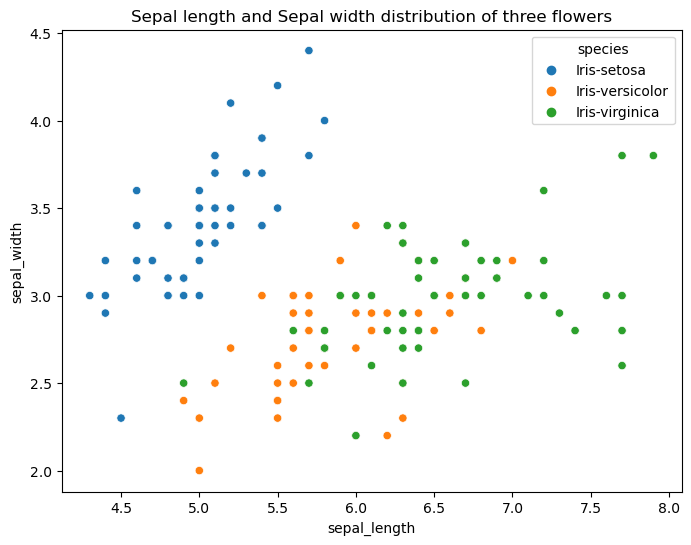

In [7]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species).set_title("Sepal length and Sepal width distribution of three flowers");

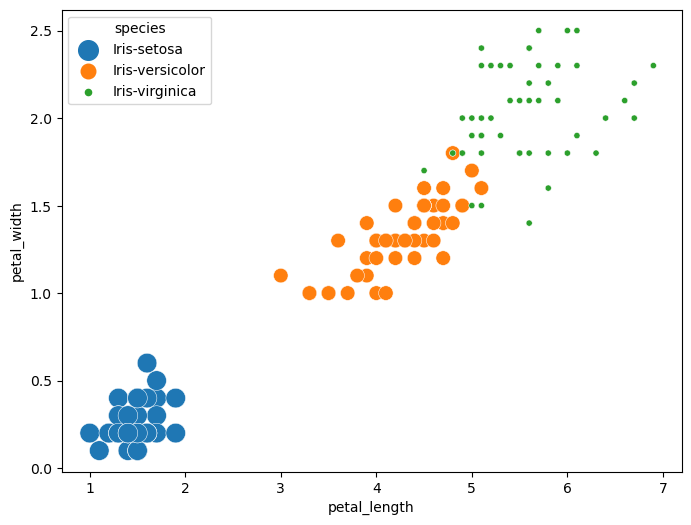

In [8]:
plt.figure(figsize=(8,6));
cmap = sns.cubehelix_palette(dark=.5, light=.9, as_cmap=True)
ax = sns.scatterplot(x="petal_length", y="petal_width",hue="species",size="species",sizes=(20,200),legend="full",data=iris);

## Creating ML Classify Models

In [9]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['species'] = lb_make.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,1
103,6.3,2.9,5.6,1.8,2
135,7.7,3.0,6.1,2.3,2


In [10]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
y = iris.species
X = iris.drop('species',axis = 1)

In [12]:
#Train and Test split,cross_val,k-fold
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
# Summary of the predictions made by the KNN
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [17]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9777777777777777


### 2) Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = nb.predict(X_test)

In [20]:
# Summary of the predictions made by the NB///Accuracy Score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


### 3) Support Vector Machine

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [23]:
y_pred = svc.predict(X_test)

In [24]:
# Summary of the predictions made by the SVC///Accuracy Score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


### 4) Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = rfc.predict(X_test)

In [28]:
# Summary of the predictions made by the Random Forest///Accuracy Score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


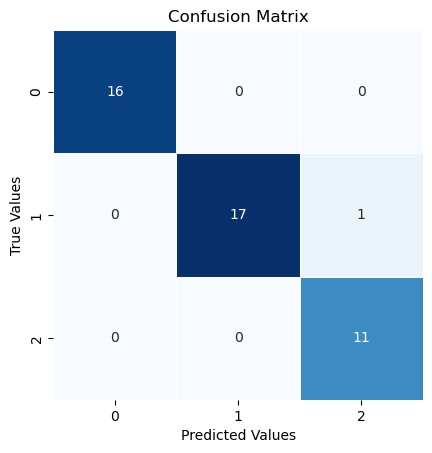

In [29]:

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5, square=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

### 5) Logistic Regression

In [30]:
df = iris[50:]
y = df.species
X = df.drop('species',axis = 1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
# Summary of the predictions made by the Logistic Reg//Accuracy Score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  1]
 [ 0 15]]
accuracy is 0.9666666666666667


### Creating validated model.

In [34]:
from sklearn.model_selection import GridSearchCV #Grid search CV method import

In [35]:
grid = {"C":np.logspace(-3,3,7),"penalty":["l1",'l2']}

In [36]:
lr_cv = GridSearchCV(lr,grid,cv =10)
lr_cv.fit(X_train,y_train)

E:\Anakonda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anakonda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anakonda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pe

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [37]:
lr_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [38]:
lr_cv_model = LogisticRegression(C=1.0, penalty='l2')
lr_cv_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = lr_cv_model.predict(X_test)

In [40]:
# Summary of the predictions made by the Logistic Reg Validated model//Accuracy Score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  1]
 [ 0 15]]
accuracy is 0.9666666666666667
